# p06: Variable coefficient wave equation

In [1]:
%config InlineBackend.figure_format='svg'
from matplotlib.collections import PolyCollection
from numpy import pi,linspace,sin,cos,exp,round,zeros,arange,real
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure

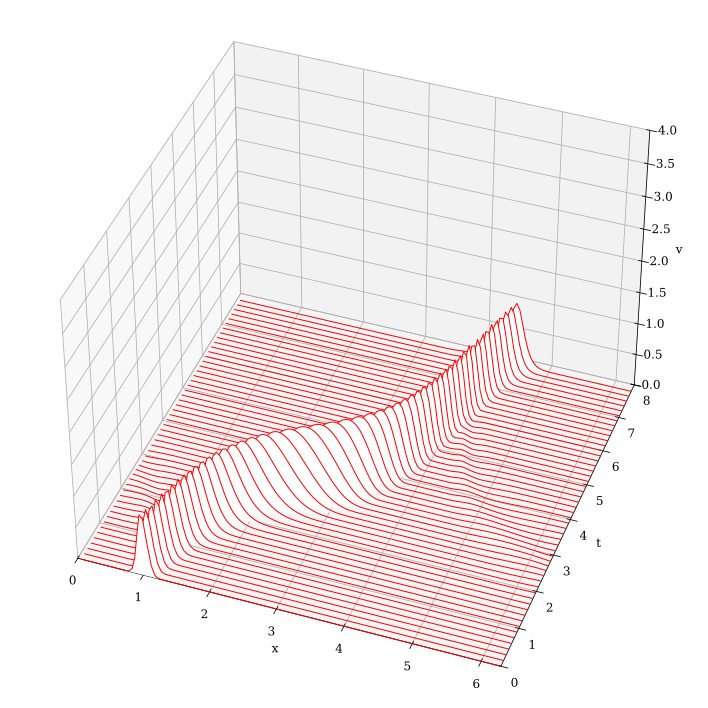

In [2]:
# Set up grid and differentiation matrix:
N = 128; h = 2*pi/N; x = h*arange(1,N+1);
t = 0.0; dt = h/4.0
tmax = 8.0; tplot = 0.15;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot))

c = 0.2 + sin(x-1.0)**2
v = exp(-100.0*(x-1.0)**2); vold = exp(-100.0*(x-0.2*dt-1.0)**2);

# wave numbers
ik = 1j*zeros(N)
ik[0:N//2+1] = 1j*arange(0,N//2+1)
ik[N//2+1:]  = 1j*arange(-N//2+1,0,1)

# Time-stepping by leap-frog formula
data = []; data.append(list(zip(x, v)))
tdata = []; tdata.append(0.0)
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        v_hat = fft(v)
        w_hat = ik * v_hat; w_hat[N//2] = 0.0
        w = real(ifft(w_hat))
        vnew = vold - 2.0*dt*c*w
        vold = v; v = vnew;
    data.append(list(zip(x, v)))
    tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = PolyCollection(data, closed=False, facecolors='white', edgecolors='red')
poly.set_alpha(1)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('x'); ax.set_ylabel('t'); ax.set_zlabel('v')
ax.set_xlim3d(0, 2*pi); ax.set_ylim3d(0, 8); ax.set_zlim3d(0, 4)
ax.view_init(40,-70)